In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

def nice(df):
    df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
    df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
    df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
    df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
    df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

    df['Gamma'] = df['Gamma'].astype(float)

    df['Infidelity'] = df['Infidelity'].abs()

    df.loc[df["Infidelity"] < 1e-12, "Infidelity"] = 1e-12

    df['Log_Infidelity'] = np.log10(df['Infidelity'])

    df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

    return df

In [2]:
df = pd.read_pickle("")


In [11]:
df

,Gamma,State,Time,gt,Fidelity,Infidelity,Log_Infidelity
0,0.079,D1,0.06000,0.004769,1.000000,1.000000e-12,-12.000000
1,0.079,D1,0.08000,0.006358,0.999997,2.744713e-06,-5.561503
2,0.079,D1,0.10000,0.007948,0.999999,7.231755e-07,-6.140756
3,0.079,D1,0.12000,0.009537,1.000000,1.277449e-07,-6.893657
4,0.079,D1,0.14000,0.011127,0.999998,2.372555e-06,-5.624784
...,...,...,...,...,...,...,...
496,251.330,D10,0.02480,6.232984,0.915469,8.453104e-02,-1.072984
497,251.330,D10,0.02485,6.245551,0.915550,8.444971e-02,-1.073402
498,251.330,D10,0.02490,6.258117,0.915631,8.436854e-02,-1.073819
499,251.330,D10,0.02495,6.270684,0.915712,8.428753e-02,-1.074237


In [6]:

df[df.Gamma == "0.079477"].Fidelity.min()

/home/zah/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


nan

In [7]:
df = nice(df)

In [13]:
df.Fidelity.min()

0.5460587921766138

In [3]:
def log_infidelity_from_gamma(df, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut=0, 
                   scale="width", palette="cool", linewidth=0.5,
                   inner=None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    ax.set_ylim(ymin, ymax)
    
    # Set major ticks
    major_ticks = np.log10([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
    ax.set_yticks(major_ticks)
    ax.set_yticklabels([r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$'])
    
    # Set minor ticks
    minor_ticks = []
    for i in range(-6, 0):
        minor_ticks.extend(np.log10(np.linspace(10**i, 10**(i+1), 9, endpoint=False)))
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.set_title(title)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')
    
    return fig

In [4]:
def log_infidelity_from_gamma(df, title):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    ax.set_ylim(ymin, ymax)
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$'])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

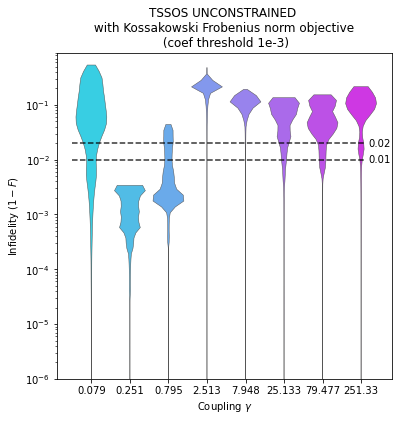

In [26]:
df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_treshold_1e-3_FROB_QO_2024-Aug-08_at_14-37.pkl")
df = nice(df)
fig3 = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-3)")

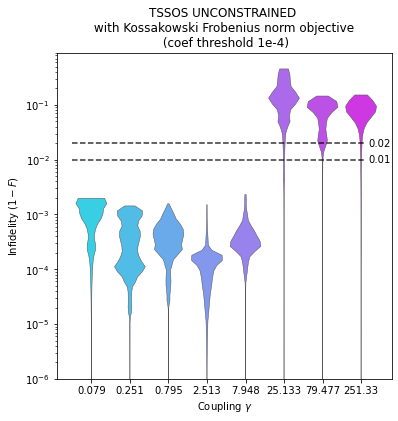

In [30]:
df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_treshold_1e-4_FROB_QO_2024-Aug-08_at_13-42.pkl")
df = nice(df)
fig4 = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-4)")

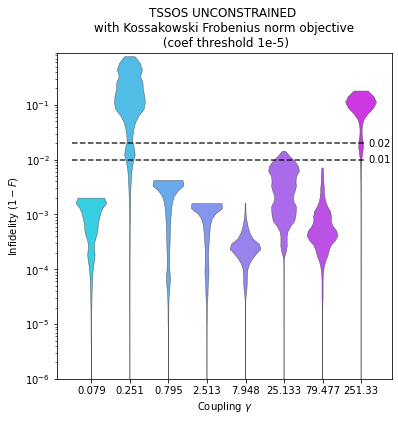

In [29]:
df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_treshold_1e-5_FROB_QO_2024-Aug-08_at_15-16.pkl")
df = nice(df)
fig5 = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-5)")

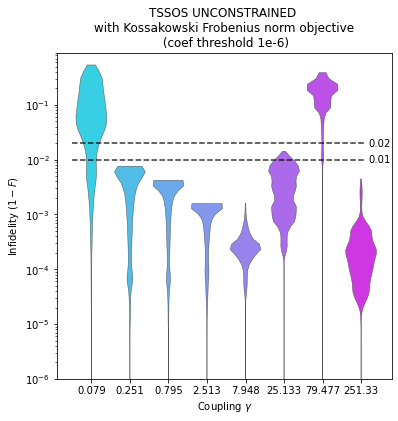

In [31]:
df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_treshold_1e-6_FROB_QO_2024-Aug-08_at_16-02.pkl")
df = nice(df)
fig6 = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-6)")

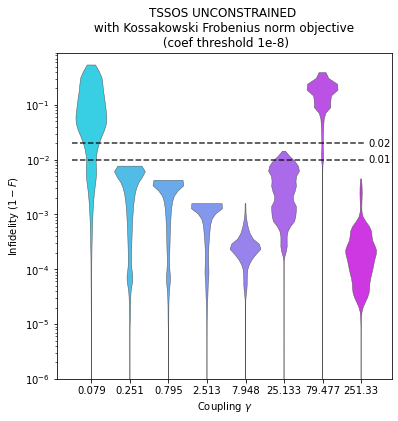

In [33]:
df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_treshold_1e-8_FROB_QO_2024-Aug-09_at_04-04.pkl")
df = nice(df)
fig8 = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-8)")

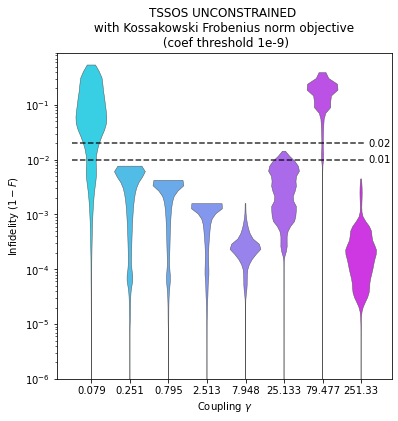

In [35]:

df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_treshold_1e-9_FROB_QO_2024-Aug-09_at_04-51.pkl")
df = nice(df)
fig9 = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-9)")

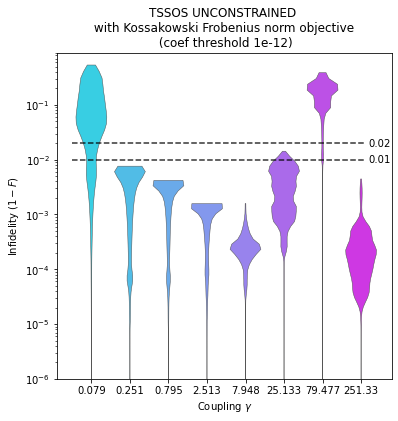

In [37]:
df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_treshold_1e-12_FROB_QO_2024-Aug-09_at_05-32.pkl")
df = nice(df)
fig9 = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-12)")

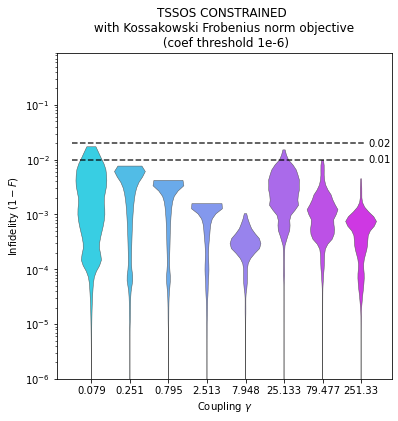

In [8]:
dfC6 = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_CONSTR_treshold_1e-6_FROB_QO_2024-Aug-10_at_03-33.pkl")
dfC6n = nice(dfC6)
figC6 = log_infidelity_from_gamma(dfC6n, "TSSOS CONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-6)")


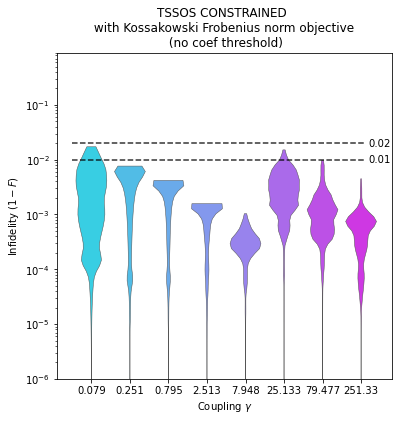

In [9]:
dfC0 = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_CONSTR_NOtreshold_FROB_QO_2024-Aug-10_at_04-03.pkl")
dfC0n = nice(dfC0)
figC0 = log_infidelity_from_gamma(dfC0, "TSSOS CONSTRAINED \n with Kossakowski Frobenius norm objective \n (no coef threshold)")

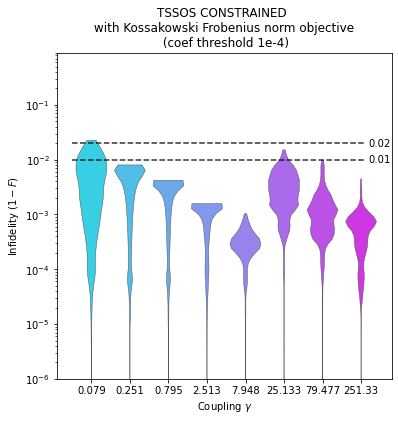

In [4]:
dfC4 = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_CONSTR_treshold_1e-4_FROB_QO_2024-Aug-10_at_12-51.pkl")
dfC4n = nice(dfC4)
fig46 = log_infidelity_from_gamma(dfC4n, "TSSOS CONSTRAINED \n with Kossakowski Frobenius norm objective \n (coef threshold 1e-4)")

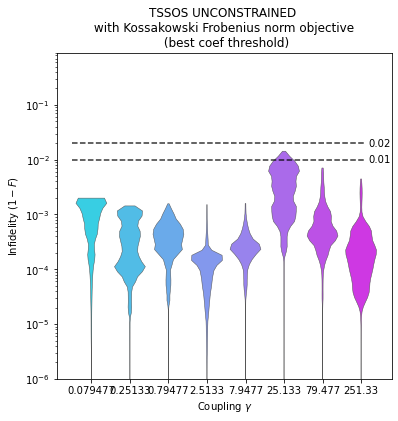

In [34]:
df = pd.read_pickle("dataframe_combined.pkl")
df = nice(df)
fig_comb = log_infidelity_from_gamma(df, "TSSOS UNCONSTRAINED \n with Kossakowski Frobenius norm objective \n (best coef threshold)")



In [25]:
fig3.savefig("LogInfidelity_TSSOS_KOS_threshold_1e-3.pdf")
fig4.savefig("LogInfidelity_TSSOS_KOS_threshold_1e-4.pdf")
fig5.savefig("LogInfidelity_TSSOS_KOS_threshold_1e-5.pdf")
fig6.savefig("LogInfidelity_TSSOS_KOS_threshold_1e-6.pdf")

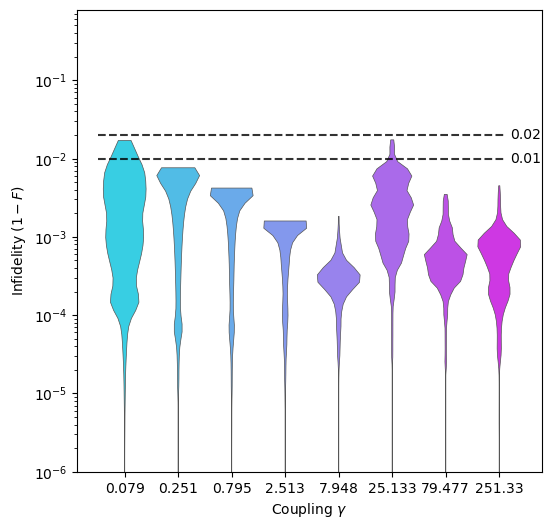

In [9]:
fig = log_infidelity_from_gamma(df, "")

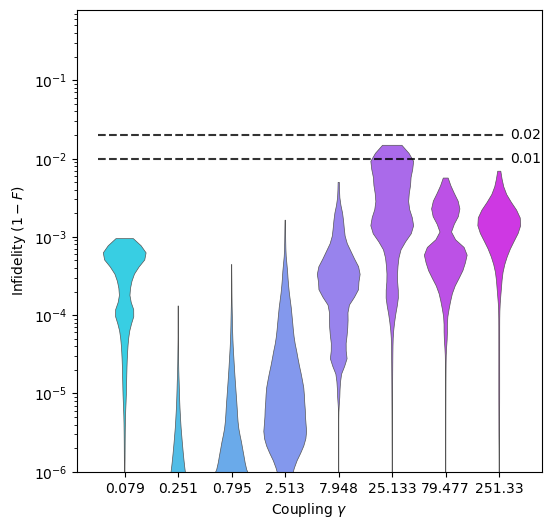

In [24]:
fig = log_infidelity_from_gamma(df, "")